In [ ]:
# !pip uninstall tfp-nightly
# input("Y")

# !pip uninstall scikit-learn -y

# !pip install -U scikit-learn

#

import warnings
warnings.filterwarnings('ignore')

# data and plotting
import pandas as pd
import numpy as np
from plotnine import *

# preprocessing
from sklearn.preprocessing import StandardScaler #Z-score variables
from sklearn.model_selection import train_test_split

# metrics
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, recall_score, roc_auc_score

# models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
        
# pipelines
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.model_selection import GridSearchCV

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC393ParlettPelleriti/main/Data/hw1.csv")

df = df.dropna()
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Group
0,-0.604285,-0.610629,0.026014,0.019710,0.406532,0.678796,0.524360,0.404739,B
1,-0.111772,-1.125178,0.744157,0.078315,0.088176,0.891009,0.018460,0.536511,B
2,-0.916802,1.965494,0.150022,0.388770,0.179276,0.064449,0.159279,0.951204,B
3,-0.280479,0.920669,0.208949,0.940153,0.854437,0.688172,0.365126,0.985259,A
4,1.856025,1.043214,0.167088,0.207002,0.979049,0.641019,0.628764,0.045912,B


In [ ]:
predictors = ["X1", "X2", "X3", "X4", "X5", "X6", "X7", "X8"]

X = df[predictors]
y = df["Group"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


z = StandardScaler()
X_train[predictors] = z.fit_transform(X_train[predictors])
X_test[predictors] = z.transform(X_test[predictors])

In [ ]:
# build parts of pipeline
z = make_column_transformer((StandardScaler(), predictors),
                            remainder = "passthrough")

svm = SVC(probability = True)

In [ ]:
# build pipeline
pipe = make_pipeline(z, svm)

# print(pipe.get_params().keys())
params = {"svc__kernel": ["linear", "rbf"],
        "svc__C": [0.001, 0.1, 1, 5, 25, 50],
          "svc__gamma": [0.001, 0.01, 0.1, 0.5, 1,2,5]}

# grid search
grid = GridSearchCV(pipe, params, scoring = "accuracy", cv = 5, refit = True) # fitting the model
print(params) # ???
# fit and check
grid.fit(X_train, y_train)

# assess performace
grid.best_estimator_.get_params()["svc__C"]
grid.best_estimator_.get_params()["svc__gamma"]

print("Train Acc: ", accuracy_score(y_train, grid.predict(X_train)))
print("Test Acc: ", accuracy_score(y_test, grid.predict(X_test)))

print("Train AUC: ", roc_auc_score(y_train, grid.predict_proba(X_train)[:,1]))
print("Test AUC: ", roc_auc_score(y_test, grid.predict_proba(X_test)[:,1]))

{'svc__kernel': ['linear', 'rbf'], 'svc__C': [0.001, 0.1, 1, 5, 25, 50], 'svc__gamma': [0.001, 0.01, 0.1, 0.5, 1, 2, 5]}
Train Acc:  0.93875
Test Acc:  0.74
Train AUC:  0.989971318752073
Test AUC:  0.7852524630541873


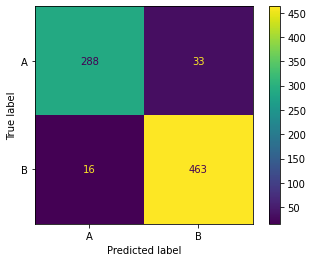

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_train, grid.predict(X_train))

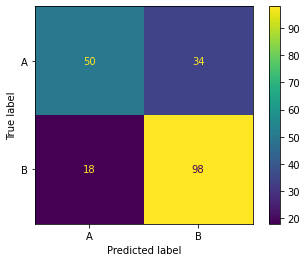

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, grid.predict(X_test))

C. What hyperparameters did GridSearch choose?

The GridSearch choose rbf kernel.

In [ ]:
# Logistric regression
myLogit = LogisticRegression()
pipe = make_pipeline(z, myLogit)

In [ ]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['X1', 'X2', 'X3', 'X4', 'X5',
                                                   'X6', 'X7', 'X8'])])),
                ('logisticregression', LogisticRegression())])

In [ ]:
predictedValsTrain = pipe.predict(X_train)
predictedValsTest = pipe.predict(X_test)

In [ ]:
print("Train Acc: ", accuracy_score(y_train, pipe.predict(X_train)))
print("Test Acc: ", accuracy_score(y_test, pipe.predict(X_test)))
print("Train AUC: ", roc_auc_score(y_train, pipe.predict_proba(X_train)[:,1]))
print("Test AUC: ", roc_auc_score(y_test, pipe.predict_proba(X_test)[:,1]))

Train Acc:  0.76375
Test Acc:  0.78
Train AUC:  0.8468772559655044
Test AUC:  0.8298440065681445


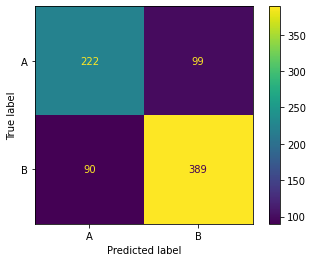

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_train, pipe.predict(X_train))

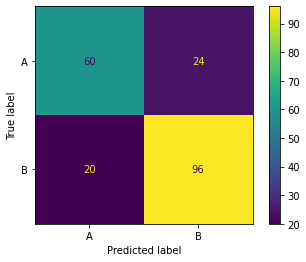

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, pipe.predict(X_test))

In [ ]:
# KNN
knn = KNeighborsClassifier()

pipe = make_pipeline(z, knn)

ks = {"kneighborsclassifier__n_neighbors": range(1,30)}

grid = GridSearchCV(pipe, ks, scoring = "accuracy", cv = 5, refit = True)

grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         ['X1',
                                                                          'X2',
                                                                          'X3',
                                                                          'X4',
                                                                          'X5',
                                                                          'X6',
                                                                          'X7',
                                                                          'X8'])])),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             param_grid={'kneighborsclassifier__n_neighbors': range(1, 30)},
             scoring='accuracy')

In [ ]:
grid.best_estimator_.get_params()["kneighborsclassifier__n_neighbors"]

28

In [ ]:
print("Train Acc: ", accuracy_score(y_train, grid.predict(X_train)))
print("Test Acc : ", accuracy_score(y_test, grid.predict(X_test)))
print("Train AUC: ", roc_auc_score(y_train, grid.predict_proba(X_train)[:,1]))
print("Test AUC: ", roc_auc_score(y_test, grid.predict_proba(X_test)[:,1]))

Train Acc:  0.76875
Test Acc :  0.735
Train AUC:  0.855162949811068
Test AUC:  0.8100369458128078


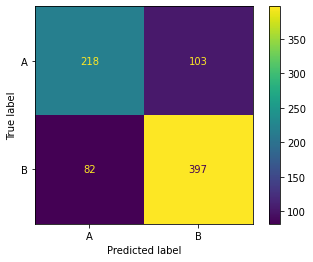

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_train, grid.predict(X_train))

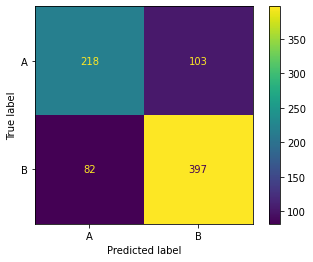

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_train, grid.predict(X_train))

In [ ]:
# doesn't show this cells output when downloading PDF
!pip install gwpy &> /dev/null

# installing necessary files
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!sudo apt-get update
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic

# installing pypandoc
!pip install pypandoc

# connecting your google drive
from google.colab import drive
drive.mount('/content/drive')

# copying your file over. Change "Class6-Completed.ipynb" to whatever your file is called (see top of notebook)
!cp "drive/My Drive/Colab Notebooks/Class6-Completed.ipynb" ./

# Again, replace "Class6-Completed.ipynb" to whatever your file is called (see top of notebook)
!jupyter nbconvert --to PDF "Class6-Completed.ipynb"

Reading package lists... Done
Building dependency tree       
Reading state information... Done
pandoc is already the newest version (2.5-3build2).
texlive is already the newest version (2019.20200218-1).
texlive-latex-extra is already the newest version (2019.202000218-1).
texlive-xetex is already the newest version (2019.20200218-1).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.
Hit:1 http://security.ubuntu.com/ubuntu focal-security InRelease
Hit:2 http://archive.ubuntu.com/ubuntu focal InRelease
Hit:3 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Hit:4 http://archive.ubuntu.com/ubuntu focal-updates InRelease
Hit:5 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease
Hit:6 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:7 http://archive.ubuntu.com/ubuntu focal-backports InRelease
Hit:8 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Hit:9 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal

F. Discuss in detail how your models performed based on the metrics you printed. Write this discussion as if you are presenting your results to a CEO/Stakeholder.

I would recommend to use the SVM model since it predicted with low bias and low variance. The SVM has best result in train model, but its test model has similar result to the KNN model.

G. Compare the performance of your model to the Logistic Regression and KNN model, and provide a justification for which model you want to use "in production".

SVM model has the best result based on its accuracy value and the AUC. The KNN model has colse result to the result of SVM model. The logistic regression model predicted less accurate than the other two models.

[SVM]
Train Acc:  0.94
Test Acc:  0.73
Train AUC:  0.98
Test AUC:  0.79

[LL]
Train Acc:  0.75
Test Acc:  0.8
Train AUC:  0.84
Test AUC:  0.87

[KNN]
Train Acc:  0.8175
Test Acc :  0.73
Train AUC:  0.90
Test AUC:  0.79